# Convolutional Networks

We've talked about the "MLP" architecture in previous lessons, in which inputs to the next layer of neurons are "fully connected" (everything is conntected to everything else). 

It turns out that for many applications in computer vision and signal processing, one can make great use of layers that look at only "local" (or "nearby") information, and then have the outpouts of those be combined at successively larger spatial (or temporal) scales.  This is what's known as a *local receptive field*, and is based directly on the biology of neurons in the visual cortex:

![neuron receptive field](https://i.imgur.com/KC4PsPc.png)
(Image source: http://neuroclusterbrain.com/neuron_model.html)

This idea was exploided in the ["Neocognitron" model](https://link.springer.com/article/10.1007/BF00344251) which built off the Nobel-prize winning work of Hubel & Weisel with cat vision, and how the different neurons in the cat brain learn to function as "pattern recognizers" for things like edges:

<iframe width="560" height="315" src="https://www.youtube.com/embed/IOHayh06LJ4" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>





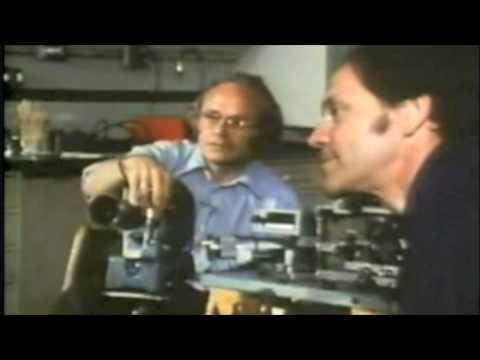

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('IOHayh06LJ4')


This work led to the development of the important "LeNet" architecture used by Yann LeCun and collaborators at Bell Labs, where this "local receptive field" is extendended though multiple layers that "stack up" a increasingly "zoomed out" version of the image.  
![lenet arch](https://cdn.inblog.in/user/uploads/b4b07bff68d8edf68622a0bb31b8aacd.png) Source: LeCun et al. 

At each stage, multiple "filter banks" exist, which filter different parts of the image.  As an illustration of this effect, consider this visualization of layer activations or "feature maps" at successive stages of a convolutional neural network being used for facial recognition:
![layer feature maps](https://hedges.belmont.edu/scottergories/images/lee_et_all_faces.png) 
(Image source: Lee et al, 2009) 

Notice how the low-level features detect various kinds of edges (as with the cat neurons), which are combined via later layers in to "mid-level features" such as eyes and noses, and finally later layers for full face images.






## So what's convolution?
Convolution is a "running" dot product of a (typically smaller) vector or matrix called the "kernel" that is "run over" a larger vector or matrix representing a signal or image.  The important point is that it's the SAME set of weights being applied *all over* the image.  This is closely related to the notion that we often want our networks to be invariant to translations in space or time.  An example you're probably familiar with is  "running average", in which the kernel is a set of constant weights.  A different example would be a "blur" filter used in photo editing, in which a weighted local average of nearby points becomes the next point.

The convolution kernel functions as a filter.  In the interactive demo below, convolution kernel in the middle is "run over" each point of the input image, and then the dot product of the (local) image pixels and the kernel becomes the new pixel in the new image. Try clicking on the point in the 3x3 kernel, and notice how the shape of the kernel tends to match whats "allowed to pass through" the filter to make up the output image:

<iframe type="text/html" src="https://hedges.belmont.edu/~shawley/acts/demo/demo_draw.html" width="700px" height="280px" frameborder="0">
 </iframe>

In [8]:
from IPython.display import HTML, IFrame 
print("Choose a kernel preset from the drop-down or click on the squares to create your own kernel.")
HTML('<iframe type="text/html" src="https://hedges.belmont.edu/~shawley/acts/demo/demo_draw.html" width="700px" height="280px" frameborder="0"></iframe>')
#IFrame('https://hedges.belmont.edu/~shawley/acts/demo/demo_draw.html', width=700, height=280)

Choose a kernel preset from the drop-down or click on the squares to create your own kernel.


With this conceptual understanding under your belt, take a look at [this great medium post by Daphne Cornelisse](https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/) 
to fill in more details of how convolution works -- note that we're going to use PyTorch code instead of Keras. 

## Convolutions and Correlations
As another way to think about convolutions -- and to give a 1D example ("signal processing") instead the 2D ("computer vision") exercises we've been doing, here's another interactive Javascript demo you can try, in the input signal is "convolved" with the second "kernel" signal.  The remainder of the demo shows the resulting filtered signal as well as the "correlation cofficient"  -- which is the familiar correlation coefficient "R" from other areas of statistics & science!  Notice that signals that "make it through" the kernel-filter are highly correlated, and vice versa.

In [10]:
IFrame('https://hedges.belmont.edu/signal_corr_trans.html', width=800, height=650)

# MNIST MLP & CNN Demo

[MNIST](http://yann.lecun.com/exdb/mnist/) is a classic dataset of handwritten digits, which has been the testing ground for a [a variety of methods](https://en.wikipedia.org/wiki/MNIST_database)(Wikipedia) in machine learning.

![MNIST example](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

While Convolutional Neural Networks -- which we'll get to below -- tend to be most effective and for image processing, the 24x24-pixel images in MNIST are small enough that we can apply the 'single hidden layer' model  (also known as a Multi-Layer Perceptron or MLP)  to it.  

Essentially, we will 'graduate' from the 7-segment display of digits from the previous lesson, to handwritten digits.  Then we'll move on to larger, more diverse image datasets.

## ~~First, check that we can use a GPU (runs faster)~~ From here down it's currently broken!  Workin' on it! Update soon!

In [11]:
# First, confirm that Keras sees the GPU. Just execute this cell. 
from keras import backend as K
assert len(K.tensorflow_backend._get_available_gpus()) > 0, \
  "No GPU found. Go to Edit > Notebook Settings > Hardware Accelerator > GPU"
print("We're good: GPU found!")

AttributeError: ignored

## Download and prepare the data:

We're going to write our neural networks using [Keras](http://keras.io), which also provides handy utility for downloading and setting up common ML datasets.

In [ ]:
import keras
from keras.datasets import mnist

# load the data, split between train and test sets
(x_train, y_train), (x_val, y_val) = mnist.load_data()
print(x_train.shape[0], 'train samples, ',x_val.shape[0], 'test samples')
print('x_train.shape     = ',x_train.shape)
img_rows, img_cols = x_train.shape[1], x_train.shape[2]  # save these for later

# recast floating-point bits, and make pixel go from 0..1
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32')  / 255

# convert target class vectors to binary class matrices
num_classes = 10              # ten classes: digts 0 to 9.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples,  10000 test samples
x_train.shape     =  (60000, 28, 28)


## Setup the MLP model:

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop, Adam


# For MLP model, we should reshape the input 24x24 images to 784x1 arrays 
# i.e., we will "flatten" each square image into a long line of pixels.
# This will be our imput.
x_train = x_train.reshape(x_train.shape[0], -1) # -1 just means make numpy figure out the rest of the shape
x_val = x_val.reshape(x_val.shape[0], -1)
print('new x_train.shape = ',x_train.shape)


# Now define the Model 
mlp = Sequential()
mlp.add(Dense(256, activation='relu', input_shape=(784,)))
mlp.add(Dense(256, activation='relu'))
mlp.add(Dense(num_classes, activation='softmax')) # softmax is like sigmoid but for when you want probabilities

mlp.summary()  # print a summary

mlp.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

new x_train.shape =  (60000, 784)
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


## Train:

In [ ]:
batch_size = 128
epochs = 20

model = mlp 
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.2620 - acc: 0.9250 - val_loss: 0.1272 - val_acc: 0.9606
Epoch 2/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.0958 - acc: 0.9705 - val_loss: 0.0897 - val_acc: 0.9715
Epoch 3/30
60000/60000 [==============================] - 3s 48us/step - loss: 0.0624 - acc: 0.9803 - val_loss: 0.0695 - val_acc: 0.9774
Epoch 4/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.0426 - acc: 0.9867 - val_loss: 0.0768 - val_acc: 0.9755
Epoch 5/30
60000/60000 [==============================] - 3s 47us/step - loss: 0.0333 - acc: 0.9895 - val_loss: 0.0832 - val_acc: 0.9750
Epoch 6/30
60000/60000 [==============================] - 3s 46us/step - loss: 0.0243 - acc: 0.9924 - val_loss: 0.0650 - val_acc: 0.9795
Epoch 7/30
60000/60000 [==============================] - 3s 47us/step - loss: 0

So we get an accuracy of around 98% with the MLP.    Let's try a Convolutional Neural Network (CNN or 'ConvNet') instead.

# What is a CNN?

Watch 
[this video by Luis Serrano](https://www.youtube.com/watch?v=2-Ol7ZB0MmU).

The CNN is based on the visual cortex of the mamial brain, specifically cats.  Read this [writeup on ConvNets](https://ml4a.github.io/ml4a/convnets/).

## Coding

Writing your own CNN by hand in numpy can be a bit involved (if you want to try, you can [watch Siraj Raval explain how](https://www.youtube.com/watch?v=FTr3n7uBIuE), but not now), so we're going to rely on Keras. 

First we need to un-flatten the images that we flattened above for the MLP model. 

## Reshape the data 'back' for CNN model
For the CNN model, we will use the images in their 24x24 form, but the Conv layers in Keras expect a 'color channel' as well, and it makes a difference what *order* the color channels are in, `channels_first` or `channels_last`... 

In [ ]:
if K.image_data_format() == 'channels_first':
  input_shape = (1, img_rows, img_cols)   # '1' for greyscale images, 3 for RGB
else:
  input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], input_shape[0], input_shape[1], input_shape[2])
x_val = x_val.reshape(x_val.shape[0], input_shape[0], input_shape[1], input_shape[2])  

## Define the CNN model

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization

cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))

cnn.summary()  # print a summary

cnn.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_79 (Dense)             (None, 32)                25632     
_________________________________________________________________
dense_80 (Dense)             (None, 10)                330       
Total para

*^ Compare the number of parameters in this model to that of the MLP model *

## And train as before...

In [ ]:
model = cnn 
epochs = 20
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_val, y_val))
score = model.evaluate(x_val, y_val, verbose=0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 9s 152us/step - loss: 0.3113 - acc: 0.9020 - val_loss: 0.0835 - val_acc: 0.9718
Epoch 2/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0822 - acc: 0.9744 - val_loss: 0.0565 - val_acc: 0.9812
Epoch 3/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0580 - acc: 0.9818 - val_loss: 0.0409 - val_acc: 0.9864
Epoch 4/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0473 - acc: 0.9852 - val_loss: 0.0530 - val_acc: 0.9830
Epoch 5/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0391 - acc: 0.9878 - val_loss: 0.0350 - val_acc: 0.9884
Epoch 6/15
60000/60000 [==============================] - 6s 96us/step - loss: 0.0330 - acc: 0.9898 - val_loss: 0.0307 - val_acc: 0.9892
Epoch 7/15
60000/60000 [==============================] - 6s 95us/step - loss: 0.0278 - acc: 0.9918 - val_loss: 0.0318 - val_ac

There are many variations we can apply to this model, adding layers with names such as "Dropout" and "Batch Normalization" too.  For now this will suffice.


**Questions for in-class discussion:**
1. If the CNN is supposed to be faster than the MLP for most applications, why is it *slower* on the MNIST dataset?
2. ...